In [2]:
import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [1]:
# Path Directories
base_path = '/Users/pp/Documents/DE-HAI/'
assimi_path = base_path + '/Q_ASSIMI_fluxnetdata_timestep.nc'
a2l_path = base_path +'/A2L_fluxnetdata_timestep.nc'
phyd_path = base_path + '/PHYD_fluxnetdata_timestep.nc'
pheno_path = base_path + '/Q_PHENO_fluxnetdata_timestep.nc'
sb_path = base_path + '/SB_fluxnetdata_timestep.nc'
spq_path = base_path + '/SPQ_fluxnetdata_timestep.nc'
veg_path = base_path + '/VEG_fluxnetdata_timestep.nc'
rad_path = base_path + '/Q_RAD_fluxnetdata_timestep.nc'
obs_path = base_path + '/obs.nc'

In [3]:
# Open NetCDF Files
ds_assimi = xr.open_dataset(assimi_path , decode_times=True)
ds_a2l = xr.open_dataset(a2l_path , decode_times=True)
ds_phyd = xr.open_dataset(phyd_path , decode_times=True)
ds_pheno = xr.open_dataset(pheno_path , decode_times=True)
ds_sb = xr.open_dataset(sb_path , decode_times=True)
ds_spq = xr.open_dataset(spq_path , decode_times=True)
ds_veg = xr.open_dataset(veg_path , decode_times=True)
ds_rad = xr.open_dataset(rad_path , decode_times=True)
ds_obs = xr.open_dataset(obs_path , decode_times=True)

In [28]:
ds_assimi.data_vars

Data variables:
    jmax         (time, q_canopy_layer) float32 5MB ...
    vcmax        (time, q_canopy_layer) float32 5MB ...
    chlfl_yield  (time, q_canopy_layer) float32 5MB ...
    gpp_avg      (time) float32 491kB ...
    gpp_c13_avg  (time) float32 491kB 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    gpp_c14_avg  (time) float32 491kB ...
    gc_avg       (time) float32 491kB ...
    beta_gs      (time) float32 491kB 0.968 0.968 0.968 ... 0.9679 0.9679 0.9679
    beta_ps      (time) float32 491kB 0.968 0.968 0.968 ... 0.9679 0.9679 0.9679

In [26]:
ds_spq.data_vars

Data variables:
    soil_depth                    (soil_layer) float32 60B ...
    min_vol_L                     (time, soil_layer) float32 7MB ...
    rho_L                         (time, soil_layer) float32 7MB ...
    snow_height                   (time) float32 491kB ...
    rootzone_soil_moisture        (time) float32 491kB ...
    rootzone_soilwater_potential  (time) float32 491kB ...
    water_content_soil_L          (time, soil_layer) float32 7MB ...
    water_content_soil            (time) float32 491kB 4.578 4.578 ... 4.63 4.63
    temperature_soil              (time) float32 491kB ...
    kdiff_sl_avg_L                (time, soil_layer) float32 7MB ...
    kdiff_sl_avg                  (time) float32 491kB ...
    pet_avg                       (time) float32 491kB ...
    evaporation_avg               (time) float32 491kB ...
    interception_avg              (time) float32 491kB ...
    transpiration_avg             (time) float32 491kB ...
    srf_runoff_avg               

In [4]:
from functions_file import netcdf_to_pandas

In [6]:
# Convert Q_Assimi DS to Pandas
assimi_vars = netcdf_to_pandas(ds_assimi, 'gpp_avg', 'beta_ps')
df_assimi = assimi_vars.quincy_to_pandas()
df_assimi

/Users/pp/Documents/Repos/QPy/Tests/quincy_vs_obs/functions_file.py:27: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dates = self.ds.indexes['time'].to_datetimeindex();


,gpp_avg,beta_ps,date
0,0.0,0.967956,2000-01-01 00:00:00
1,0.0,0.967956,2000-01-01 00:30:00
2,0.0,0.967956,2000-01-01 01:00:00
3,0.0,0.967956,2000-01-01 01:30:00
4,0.0,0.967956,2000-01-01 02:00:00
...,...,...,...
122635,0.0,0.967891,2006-12-31 21:30:00
122636,0.0,0.967891,2006-12-31 22:00:00
122637,0.0,0.967891,2006-12-31 22:30:00
122638,0.0,0.967891,2006-12-31 23:00:00


In [7]:
# Convert Observations DS to Pandas

obs_vars = netcdf_to_pandas(ds_obs, 'GPP', 'NEE')
df_obs = obs_vars.obs_to_pandas()
df_obs

,GPP,date
0,-0.132687,2000-01-01 00:30:00
1,0.076432,2000-01-01 01:00:00
2,-0.131226,2000-01-01 01:30:00
3,-0.126098,2000-01-01 02:00:00
4,-0.124629,2000-01-01 02:30:00
...,...,...
122731,-0.987185,2006-12-31 22:00:00
122732,0.299952,2006-12-31 22:30:00
122733,-0.075597,2006-12-31 23:00:00
122734,0.324922,2006-12-31 23:30:00


In [8]:
from functions_file import netcdf_to_pandas_with_list

In [9]:
ds_assimi.data_vars

Data variables:
    jmax         (time, q_canopy_layer) float32 5MB ...
    vcmax        (time, q_canopy_layer) float32 5MB ...
    chlfl_yield  (time, q_canopy_layer) float32 5MB ...
    gpp_avg      (time) float32 491kB ...
    gpp_c13_avg  (time) float32 491kB ...
    gpp_c14_avg  (time) float32 491kB ...
    gc_avg       (time) float32 491kB ...
    beta_gs      (time) float32 491kB ...
    beta_ps      (time) float32 491kB 0.968 0.968 0.968 ... 0.9679 0.9679 0.9679

In [10]:
# try function to convert list of vars into pandas
# Convert Q_Assimi DS to Pandas
list_vars=['gpp_c13_avg', 'beta_ps', 'beta_gs']
assimi_vars = netcdf_to_pandas_with_list(ds_assimi, 'gpp_avg', list_vars)
df_assimi = assimi_vars.quincy_to_pandas()
df_assimi

/Users/pp/Documents/Repos/QPy/Tests/quincy_vs_obs/functions_file.py:64: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dates = self.ds.indexes['time'].to_datetimeindex();


,gpp_avg,gpp_c13_avg,beta_ps,beta_gs,date
0,0.0,0.0,0.967956,0.967956,2000-01-01 00:00:00
1,0.0,0.0,0.967956,0.967956,2000-01-01 00:30:00
2,0.0,0.0,0.967956,0.967956,2000-01-01 01:00:00
3,0.0,0.0,0.967956,0.967956,2000-01-01 01:30:00
4,0.0,0.0,0.967956,0.967956,2000-01-01 02:00:00
...,...,...,...,...,...
122635,0.0,0.0,0.967891,0.967891,2006-12-31 21:30:00
122636,0.0,0.0,0.967891,0.967891,2006-12-31 22:00:00
122637,0.0,0.0,0.967891,0.967891,2006-12-31 22:30:00
122638,0.0,0.0,0.967891,0.967891,2006-12-31 23:00:00


In [11]:
# Convert PHYD DS to Pandas
list_vars=['psi_stem_avg','stem_flow_avg','G_avg']
assimi_vars = netcdf_to_pandas_with_list(ds_phyd, 'psi_leaf_avg', list_vars)
df_phyd = assimi_vars.quincy_to_pandas()
df_phyd

/Users/pp/Documents/Repos/QPy/Tests/quincy_vs_obs/functions_file.py:64: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dates = self.ds.indexes['time'].to_datetimeindex();


,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg,date
0,-0.161403,-0.100078,0.0,0.0,2000-01-01 00:00:00
1,-0.161403,-0.100078,0.0,0.0,2000-01-01 00:30:00
2,-0.161403,-0.100078,0.0,0.0,2000-01-01 01:00:00
3,-0.161403,-0.100078,0.0,0.0,2000-01-01 01:30:00
4,-0.161403,-0.100078,0.0,0.0,2000-01-01 02:00:00
...,...,...,...,...,...
122635,-0.162784,-0.100632,0.0,0.0,2006-12-31 21:30:00
122636,-0.162784,-0.100632,0.0,0.0,2006-12-31 22:00:00
122637,-0.162784,-0.100632,0.0,0.0,2006-12-31 22:30:00
122638,-0.162784,-0.100632,0.0,0.0,2006-12-31 23:00:00


In [12]:
# Convert veg DS to Pandas
assimi_vars = netcdf_to_pandas(ds_veg, 'LAI', 'npp_avg')
df_veg = assimi_vars.quincy_to_pandas()
df_veg

/Users/pp/Documents/Repos/QPy/Tests/quincy_vs_obs/functions_file.py:27: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dates = self.ds.indexes['time'].to_datetimeindex();


,LAI,npp_avg,date
0,0.0,-0.395208,2000-01-01 00:00:00
1,0.0,-0.360812,2000-01-01 00:30:00
2,0.0,-0.364103,2000-01-01 01:00:00
3,0.0,-0.367120,2000-01-01 01:30:00
4,0.0,-0.368413,2000-01-01 02:00:00
...,...,...,...
122635,0.0,-0.405859,2006-12-31 21:30:00
122636,0.0,-0.398726,2006-12-31 22:00:00
122637,0.0,-0.394391,2006-12-31 22:30:00
122638,0.0,-0.398555,2006-12-31 23:00:00


In [13]:
# Convert spq DS to Pandas
list_vars=['qh_avg','water_content_soil']
assimi_vars = netcdf_to_pandas_with_list(ds_spq, 'qle_avg', list_vars)
df_spq = assimi_vars.quincy_to_pandas()
df_spq

/Users/pp/Documents/Repos/QPy/Tests/quincy_vs_obs/functions_file.py:64: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dates = self.ds.indexes['time'].to_datetimeindex();


,qle_avg,qh_avg,water_content_soil,date
0,1.720109,7.999019,4.577979,2000-01-01 00:00:00
1,3.366349,7.130036,4.577973,2000-01-01 00:30:00
2,6.023600,12.139695,4.577968,2000-01-01 01:00:00
3,5.768594,12.004929,4.577962,2000-01-01 01:30:00
4,5.495220,11.322305,4.577957,2000-01-01 02:00:00
...,...,...,...,...
122635,3.498208,18.827412,4.630137,2006-12-31 21:30:00
122636,2.210837,8.108362,4.630136,2006-12-31 22:00:00
122637,6.150603,18.462692,4.630133,2006-12-31 22:30:00
122638,8.566786,25.614193,4.630129,2006-12-31 23:00:00


In [14]:
# Convert sb DS to Pandas
list_vars=[]
assimi_vars = netcdf_to_pandas_with_list(ds_sb, 'het_respiration_avg', list_vars)
df_sb = assimi_vars.quincy_to_pandas()
df_sb

/Users/pp/Documents/Repos/QPy/Tests/quincy_vs_obs/functions_file.py:64: RuntimeWarning: Converting a CFTimeIndex with dates from a non-standard calendar, 'noleap', to a pandas.DatetimeIndex, which uses dates from the standard calendar.  This may lead to subtle errors in operations that depend on the length of time between dates.
  dates = self.ds.indexes['time'].to_datetimeindex();


,het_respiration_avg,date
0,0.641422,2000-01-01 00:00:00
1,0.456925,2000-01-01 00:30:00
2,0.455321,2000-01-01 01:00:00
3,0.455347,2000-01-01 01:30:00
4,0.453678,2000-01-01 02:00:00
...,...,...
122635,0.493470,2006-12-31 21:30:00
122636,0.486809,2006-12-31 22:00:00
122637,0.474696,2006-12-31 22:30:00
122638,0.469773,2006-12-31 23:00:00


In [15]:
# Convert obs DS to Pandas
list_vars=['LE', 'GPP', 'H',]
obs_vars = netcdf_to_pandas_with_list(ds_obs, 'NEE', list_vars)
df_obs = obs_vars.obs_to_pandas()
df_obs

,NEE,LE,GPP,H,date
0,0.875941,-2.100149,-0.132687,-16.754679,2000-01-01 00:30:00
1,0.663175,-1.096890,0.076432,-9.788290,2000-01-01 01:00:00
2,0.875941,-1.638050,-0.131226,-9.625420,2000-01-01 01:30:00
3,0.875941,-1.227500,-0.126098,-12.167960,2000-01-01 02:00:00
4,0.875941,-2.125300,-0.124629,-12.011800,2000-01-01 02:30:00
...,...,...,...,...,...
122731,2.381006,-11.273950,-0.987185,-1.534428,2006-12-31 22:00:00
122732,1.117581,-13.629350,0.299952,-33.139187,2006-12-31 22:30:00
122733,1.517891,-13.594760,-0.075597,-31.531368,2006-12-31 23:00:00
122734,1.129487,-13.077799,0.324922,-33.202045,2006-12-31 23:30:00


In [16]:
# List of DataFrames to merge
list_dfs = [df_obs, df_assimi, df_phyd, df_spq, df_sb]

# Initialize df_all with df_veg
df_all = df_veg

# Merge each DataFrame in the list with df_all
for df in list_dfs:
    df_all = df_all.merge(df, on='date')

# Display the final merged DataFrame
df_all

,LAI,npp_avg,date,NEE,LE,GPP,H,gpp_avg,gpp_c13_avg,beta_ps,beta_gs,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg,qle_avg,qh_avg,water_content_soil,het_respiration_avg
0,0.0,-0.360812,2000-01-01 00:30:00,0.875941,-2.100149,-0.132687,-16.754679,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,3.366349,7.130036,4.577973,0.456925
1,0.0,-0.364103,2000-01-01 01:00:00,0.663175,-1.096890,0.076432,-9.788290,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,6.023600,12.139695,4.577968,0.455321
2,0.0,-0.367120,2000-01-01 01:30:00,0.875941,-1.638050,-0.131226,-9.625420,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,5.768594,12.004929,4.577962,0.455347
3,0.0,-0.368413,2000-01-01 02:00:00,0.875941,-1.227500,-0.126098,-12.167960,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,5.495220,11.322305,4.577957,0.453678
4,0.0,-0.372617,2000-01-01 02:30:00,0.875941,-2.125300,-0.124629,-12.011800,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,7.974962,16.835342,4.577952,0.451262
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122634,0.0,-0.405859,2006-12-31 21:30:00,0.985998,-18.573799,0.400971,-2.204931,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.0,0.0,3.498208,18.827412,4.630137,0.493470
122635,0.0,-0.398726,2006-12-31 22:00:00,2.381006,-11.273950,-0.987185,-1.534428,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.0,0.0,2.210837,8.108362,4.630136,0.486809
122636,0.0,-0.394391,2006-12-31 22:30:00,1.117581,-13.629350,0.299952,-33.139187,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.0,0.0,6.150603,18.462692,4.630133,0.474696
122637,0.0,-0.398555,2006-12-31 23:00:00,1.517891,-13.594760,-0.075597,-31.531368,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.0,0.0,8.566786,25.614193,4.630129,0.469773


In [17]:
# Calculate NEE -> NPP minus Heterotrophic Respiration
df_all['NEE_quincy']=df_all['npp_avg']-df_all['het_respiration_avg']
df_all

,LAI,npp_avg,date,NEE,LE,GPP,H,gpp_avg,gpp_c13_avg,beta_ps,beta_gs,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg,qle_avg,qh_avg,water_content_soil,het_respiration_avg,NEE_quincy
0,0.0,-0.360812,2000-01-01 00:30:00,0.875941,-2.100149,-0.132687,-16.754679,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,3.366349,7.130036,4.577973,0.456925,-0.817736
1,0.0,-0.364103,2000-01-01 01:00:00,0.663175,-1.096890,0.076432,-9.788290,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,6.023600,12.139695,4.577968,0.455321,-0.819424
2,0.0,-0.367120,2000-01-01 01:30:00,0.875941,-1.638050,-0.131226,-9.625420,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,5.768594,12.004929,4.577962,0.455347,-0.822467
3,0.0,-0.368413,2000-01-01 02:00:00,0.875941,-1.227500,-0.126098,-12.167960,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,5.495220,11.322305,4.577957,0.453678,-0.822091
4,0.0,-0.372617,2000-01-01 02:30:00,0.875941,-2.125300,-0.124629,-12.011800,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.0,0.0,7.974962,16.835342,4.577952,0.451262,-0.823879
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122634,0.0,-0.405859,2006-12-31 21:30:00,0.985998,-18.573799,0.400971,-2.204931,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.0,0.0,3.498208,18.827412,4.630137,0.493470,-0.899329
122635,0.0,-0.398726,2006-12-31 22:00:00,2.381006,-11.273950,-0.987185,-1.534428,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.0,0.0,2.210837,8.108362,4.630136,0.486809,-0.885535
122636,0.0,-0.394391,2006-12-31 22:30:00,1.117581,-13.629350,0.299952,-33.139187,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.0,0.0,6.150603,18.462692,4.630133,0.474696,-0.869087
122637,0.0,-0.398555,2006-12-31 23:00:00,1.517891,-13.594760,-0.075597,-31.531368,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.0,0.0,8.566786,25.614193,4.630129,0.469773,-0.868328


In [18]:
# This takes an average for each variable for each day
df_all_daily = df_all.groupby(pd.Grouper(key='date', freq='D')).mean()
# This turns date into an index again, so we need to remove it:
df_all_daily.reset_index(inplace=True)
df_all_daily

,date,LAI,npp_avg,NEE,LE,GPP,H,gpp_avg,gpp_c13_avg,beta_ps,beta_gs,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg,qle_avg,qh_avg,water_content_soil,het_respiration_avg,NEE_quincy
0,2000-01-01,0.0,-0.381399,1.023545,-1.660283,-0.192126,-18.868605,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.000000e+00,0.000000e+00,7.830437,14.035482,4.577957,0.473174,-0.854573
1,2000-01-02,0.0,-0.382568,1.062369,0.936583,-0.204670,-11.217892,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.000000e+00,0.000000e+00,5.265442,14.860878,4.578170,0.758004,-1.140572
2,2000-01-03,0.0,-0.379982,1.162212,0.622874,-0.235743,-12.228921,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.000000e+00,0.000000e+00,7.598898,23.976402,4.578494,1.058610,-1.438592
3,2000-01-04,0.0,-0.380981,1.061077,-3.472215,-0.044913,-33.338536,0.0,0.0,0.968034,0.968034,-0.159630,-0.098186,3.313322e-09,3.353133e-07,17.441717,35.087872,4.579119,1.317055,-1.698036
4,2000-01-05,0.0,-0.386470,1.100792,3.850945,-0.068854,-25.513101,0.0,0.0,0.968226,0.968226,-0.155676,-0.094354,0.000000e+00,0.000000e+00,-2.724607,19.485224,4.579840,1.419251,-1.805721
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2552,2006-12-27,0.0,-0.418033,1.456979,7.619311,-0.251223,12.579708,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.000000e+00,0.000000e+00,-0.012454,-2.281687,4.630529,1.400542,-1.818576
2553,2006-12-28,0.0,-0.410229,1.225837,-0.714789,-0.169723,5.032128,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.000000e+00,0.000000e+00,0.000000,-2.431234,4.630506,1.304874,-1.715103
2554,2006-12-29,0.0,-0.382686,1.093916,3.178730,0.113529,13.499432,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.000000e+00,0.000000e+00,0.024891,-6.962427,4.630103,0.733186,-1.115872
2555,2006-12-30,0.0,-0.338496,1.705225,-3.228591,-0.386510,7.945188,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.000000e+00,0.000000e+00,-0.035857,-15.009662,4.629941,0.514456,-0.852952


In [19]:
# This takes an average for each variable for each day
df_all_monthly = df_all.groupby(pd.Grouper(key='date', freq='ME')).mean()
# This turns date into an index again, so we need to remove it:
df_all_monthly.reset_index(inplace=True)
df_all_monthly

,date,LAI,npp_avg,NEE,LE,GPP,H,gpp_avg,gpp_c13_avg,beta_ps,beta_gs,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg,qle_avg,qh_avg,water_content_soil,het_respiration_avg,NEE_quincy
0,2000-01-31,0.000000,-0.315311,0.904120,1.141822,-0.011660,-10.415232,0.000000,0.000000,0.968194,0.968194,-0.156354,-0.095028,1.070217e-10,1.083673e-08,4.591988,12.201517,4.579604,0.800502,-1.115814
1,2000-02-29,0.000000,-0.404567,1.020470,4.369398,0.093018,-7.585824,0.000000,0.000000,0.968226,0.968226,-0.155670,-0.094348,0.000000e+00,0.000000e+00,-7.066085,13.458371,4.589157,1.385669,-1.790236
2,2000-03-31,0.000000,-0.478365,1.359037,9.898472,0.242077,13.897580,0.000000,0.000000,0.968226,0.968226,-0.155663,-0.094344,3.047896e-14,0.000000e+00,-18.071796,3.121098,4.606258,1.751957,-2.230322
3,2000-04-30,0.000000,-0.666145,1.468278,20.769790,2.194740,48.340052,0.000000,0.000000,0.968227,0.968227,-0.155655,-0.094339,2.819239e-14,0.000000e+00,-48.407108,-19.567043,4.619094,2.801159,-3.467304
4,2000-05-31,1.251230,1.563208,-3.508155,48.209331,8.994481,44.932911,4.262228,0.045910,0.966513,0.966513,-0.190957,-0.123781,4.733400e-04,4.732609e-04,-59.848087,-71.535179,4.621452,3.739223,-2.176016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
79,2006-08-31,6.130741,5.287161,-5.051894,33.383977,8.506733,8.994519,9.337121,0.100560,0.963423,0.963423,-0.250006,-0.174464,1.069673e-03,1.069699e-03,-69.176521,-17.756994,4.634588,2.725540,2.561620
80,2006-09-30,6.192617,4.395860,-4.022772,37.235885,7.094268,13.659712,8.678963,0.093571,0.962466,0.962466,-0.267371,-0.189673,1.235093e-03,1.235010e-03,-59.728725,-5.873049,4.630102,2.008646,2.387214
81,2006-10-31,6.226840,1.847433,-0.259314,9.846122,2.922363,-12.510564,4.731982,0.050952,0.963182,0.963182,-0.255102,-0.187557,4.262403e-04,4.262475e-04,-27.813555,9.576540,4.622636,1.807925,0.039508
82,2006-11-30,2.956465,0.566612,2.208297,2.111872,0.164488,-23.691147,1.761122,0.018945,0.965115,0.965115,-0.218131,-0.154631,1.025953e-04,1.027311e-04,-12.394978,19.694790,4.621710,2.047864,-1.481252


In [20]:
# This takes an average for each variable for each day
df_all_yearly = df_all.groupby(pd.Grouper(key='date', freq='YE')).mean()
# This turns date into an index again, so we need to remove it:
df_all_yearly.reset_index(inplace=True)
df_all_yearly

,date,LAI,npp_avg,NEE,LE,GPP,H,gpp_avg,gpp_c13_avg,beta_ps,beta_gs,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg,qle_avg,qh_avg,water_content_soil,het_respiration_avg,NEE_quincy
0,2000-12-31,2.791011,2.052573,-1.297020,22.281978,4.407185,9.468393,4.129339,0.044477,0.966465,0.966465,-0.191207,-0.122593,0.000582,0.000582,-40.909370,-15.201052,4.610899,2.236095,-0.183522
1,2001-12-31,2.639081,1.926765,-1.605518,21.558317,4.190819,8.845523,3.915949,0.042185,0.966592,0.966592,-0.188421,-0.119656,0.000586,0.000586,-38.941338,-14.675904,4.647400,1.733119,0.193646
2,2002-12-31,2.258177,1.809899,-1.397180,20.971137,4.024370,6.393486,3.753592,0.040436,0.967031,0.967031,-0.179926,-0.111575,0.000550,0.000550,-40.345612,-10.622956,4.688426,2.221082,-0.411184
3,2003-12-31,2.450884,2.256211,-1.027041,21.398436,3.534041,18.082071,4.393744,0.047361,0.965408,0.965408,-0.206929,-0.135618,0.000785,0.000694,-46.539253,-14.237374,4.682804,1.548937,0.707274
4,2004-12-31,2.517107,2.114906,-1.026238,19.815434,3.670093,13.029741,4.098715,0.044146,0.966118,0.966118,-0.197719,-0.129088,0.000554,0.000554,-35.239960,-12.180259,4.623869,1.946881,0.168024
5,2005-12-31,3.057232,2.274309,-1.361560,20.660250,3.906724,14.179692,4.485474,0.048333,0.966260,0.966260,-0.195150,-0.125740,0.000598,0.000598,-39.069153,-12.206075,4.644751,2.046629,0.227680
6,2006-12-31,2.724598,2.045436,-1.232611,21.496355,3.929277,12.134182,4.281583,0.046161,0.965905,0.965905,-0.201564,-0.131862,0.000606,0.000606,-40.498077,-10.014757,4.642081,1.867206,0.178230


In [21]:
# This takes an average for each variable for each day
df_all_weekly = df_all.groupby(pd.Grouper(key='date', freq='W')).mean()
# This turns date into an index again, so we need to remove it:
df_all_weekly.reset_index(inplace=True)
df_all_weekly

,date,LAI,npp_avg,NEE,LE,GPP,H,gpp_avg,gpp_c13_avg,beta_ps,beta_gs,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg,qle_avg,qh_avg,water_content_soil,het_respiration_avg,NEE_quincy
0,2000-01-02,0.0,-0.381990,1.043162,-0.348182,-0.198464,-15.002981,0.0,0.0,0.967956,0.967956,-0.161403,-0.100078,0.000000e+00,0.000000e+00,6.534440,14.452523,4.578064,0.617088,-0.999078
1,2000-01-09,0.0,-0.389248,1.141314,0.362080,-0.081592,-14.373000,0.0,0.0,0.968160,0.968160,-0.157059,-0.095719,4.733317e-10,4.790190e-08,5.775933,20.160610,4.579970,1.353071,-1.742319
2,2000-01-16,0.0,-0.325287,0.849583,1.121243,0.187166,-5.551416,0.0,0.0,0.968226,0.968226,-0.155676,-0.094354,0.000000e+00,0.000000e+00,0.922128,-0.063503,4.580361,0.586280,-0.911567
3,2000-01-23,0.0,-0.323337,0.669672,1.880611,0.030022,-11.929477,0.0,0.0,0.968226,0.968226,-0.155676,-0.094354,0.000000e+00,0.000000e+00,5.448877,9.892015,4.580526,0.743641,-1.066978
4,2000-01-30,0.0,-0.205138,0.902756,2.326699,-0.195120,-4.393467,0.0,0.0,0.968226,0.968226,-0.155676,-0.094354,3.029596e-13,5.709485e-11,3.800189,14.414968,4.578056,0.450291,-0.655429
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,2006-12-03,0.0,-0.910049,2.273610,1.701603,0.124943,-24.524749,0.0,0.0,0.967345,0.967345,-0.174214,-0.112082,0.000000e+00,0.000000e+00,2.348518,9.225231,4.624343,2.265373,-3.175423
362,2006-12-10,0.0,-0.892079,1.791869,-5.436726,0.102813,-29.524460,0.0,0.0,0.967345,0.967345,-0.174214,-0.112082,0.000000e+00,0.000000e+00,1.107757,25.054237,4.625509,2.233431,-3.125510
363,2006-12-17,0.0,-0.630987,1.759539,-2.359847,0.188816,-26.764729,0.0,0.0,0.967636,0.967636,-0.168075,-0.105897,9.449179e-10,9.689703e-08,0.572524,20.463963,4.627285,1.769621,-2.400608
364,2006-12-24,0.0,-0.522342,1.724414,1.962045,-0.145406,-1.024200,0.0,0.0,0.967891,0.967891,-0.162784,-0.100632,0.000000e+00,0.000000e+00,0.494166,8.575300,4.629403,1.576472,-2.098814


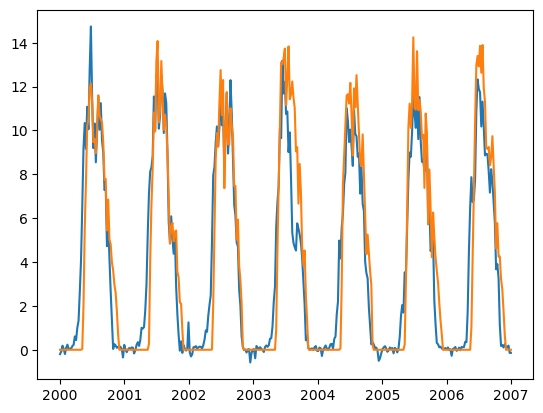

In [22]:
# Plot the GPP Comparison
plt.plot(df_all_weekly['date'],df_all_weekly['GPP'])
plt.plot(df_all_weekly['date'],df_all_weekly['gpp_avg'])

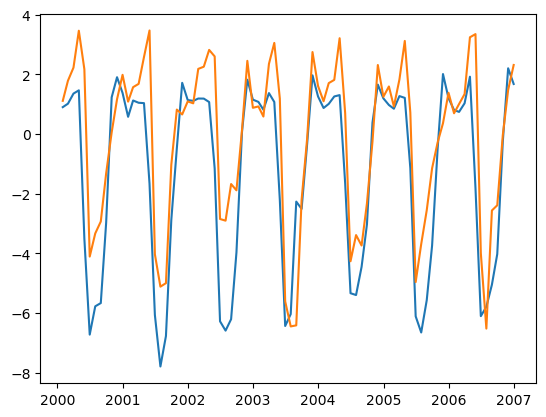

In [22]:
# Plot the NEE Comparison
plt.plot(df_all_monthly['date'],df_all_monthly['NEE'])
plt.plot(df_all_monthly['date'],-df_all_monthly['NEE_quincy'])

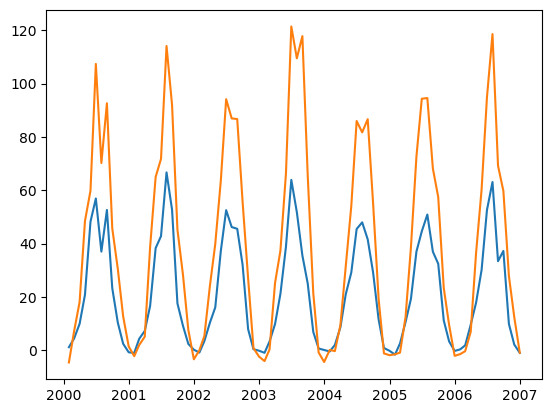

In [23]:
# Plot the Latent Energy Comparison
# They're very different but the qle_avg is only latent energy from the soil
plt.plot(df_all_monthly['date'],df_all_monthly['LE'])
plt.plot(df_all_monthly['date'],-df_all_monthly['qle_avg'])

In [24]:
from functions_file import StatMeasures

In [25]:
NEE_daily_rmse = StatMeasures(df_all_daily['NEE_quincy'],df_all_daily['NEE'])
print(NEE_daily_rmse)

In [27]:
 NEE_rmse_daily = rmse(df_all_daily['NEE_quincy'],df_all_daily['NEE'])
GPP_rmse_daily = rmse(df_all_daily['gpp_avg'],df_all_daily['GPP'])


In [33]:
# At Date as an index for use when calculating seasonality
df_all_indexed=df_all.set_index(df_all.date, inplace=False)
df_all_indexed.drop(['date'], axis=1, inplace=True)
df_all_indexed

# Average by month
df_all_monthly_avg = df_all_indexed.groupby([df_all_indexed.index.month]).mean()
df_all_monthly_avg.reset_index(inplace=True)
df_all_monthly_avg

# Average by hour
df_all_hourly_avg = df_all_indexed.groupby([df_all_indexed.index.hour]).mean()
df_all_hourly_avg.reset_index(inplace=True)
df_all_hourly_avg.rename(columns={"date": "hour"}, inplace=True)
df_all_hourly_avg

,hour,LAI,npp_avg,NEE,LE,GPP,H,gpp_avg,gpp_c13_avg,beta_ps,beta_gs,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg,qle_avg,qh_avg,water_content_soil,het_respiration_avg,NEE_quincy
0,0,2.634539,-1.974478,2.504848,-2.992908,0.071405,-27.854563,0.000062,6.629168e-07,0.966801,0.966801,-0.184495,-0.122342,0.000042,0.000040,-3.896083,6.878473,4.648608,1.759567,-3.734046
1,1,2.634040,-1.943005,2.511068,-3.101353,0.035540,-26.919931,0.000000,0.000000e+00,0.966808,0.966808,-0.184425,-0.122359,0.000038,0.000036,-3.559585,6.406330,4.648595,1.729936,-3.672942
2,2,2.634060,-1.912318,2.488710,-3.282806,0.030310,-26.362422,0.000034,3.593694e-07,0.966810,0.966810,-0.184430,-0.122398,0.000034,0.000033,-3.416419,5.863949,4.648598,1.703354,-3.615671
3,3,2.634074,-1.883175,2.493559,-3.371768,-0.000181,-25.888348,0.000401,4.303146e-06,0.966811,0.966811,-0.184409,-0.122425,0.000031,0.000030,-3.368582,5.466544,4.648600,1.678035,-3.561210
4,4,2.634089,-1.648238,2.473665,-3.373985,-0.003267,-25.507282,0.211083,2.271026e-03,0.966811,0.966811,-0.184555,-0.122495,0.000040,0.000039,-3.764163,4.926383,4.648602,1.656347,-3.304585
5,5,2.634095,-0.483864,1.799445,-2.205400,0.657190,-23.899102,1.365492,1.471306e-02,0.966790,0.966790,-0.185406,-0.122799,0.000097,0.000095,-6.553662,3.237275,4.648603,1.644622,-2.128486
6,6,2.634094,1.518862,0.012187,2.480305,2.449915,-17.285520,3.380546,3.644835e-02,0.966718,0.966718,-0.187605,-0.123280,0.000225,0.000220,-13.561535,-1.344484,4.648604,1.660203,-0.141341
7,7,2.634094,3.781594,-2.228747,12.768261,4.720514,-1.693517,5.681877,6.123215e-02,0.966570,0.966570,-0.190985,-0.124484,0.000460,0.000449,-27.014288,-10.464672,4.648604,1.714411,2.067184
8,8,2.634084,5.781862,-4.181480,26.796394,6.725775,22.318322,7.740187,8.337633e-02,0.966314,0.966314,-0.196667,-0.126297,0.000770,0.000750,-46.917797,-23.941223,4.648605,1.806411,3.975451
9,9,2.634065,7.275706,-5.492454,42.646054,8.101874,48.671771,9.306033,1.002325e-01,0.965978,0.965978,-0.202555,-0.127901,0.001100,0.001074,-69.431442,-37.928955,4.648606,1.920162,5.355545


In [34]:
# Average by day
df_all_daily_avg = df_all_indexed.groupby([df_all_indexed.index.month,df_all_indexed.index.day]).mean()
#df_all_daily_avg.reset_index(inplace=True)
df_all_hourly_avg.rename(columns={"date": "day"}, inplace=True)
df_all_daily_avg


LAI   npp_avg       NEE        LE       GPP          H  gpp_avg  \
date date                                                                    
1    1     0.0 -0.302452  1.040665 -0.745982 -0.143986 -17.245457      0.0   
     2     0.0 -0.331638  0.954792 -3.254424  0.012630 -25.323290      0.0   
     3     0.0 -0.376373  0.944116 -2.869563 -0.041711 -26.684922      0.0   
     4     0.0 -0.346256  0.951720 -1.543062 -0.081994 -19.702061      0.0   
     5     0.0 -0.326604  0.894774 -0.256140 -0.007813 -18.311551      0.0   
...        ...       ...       ...       ...       ...        ...      ...   
12   27    0.0 -0.405997  1.060621 -0.746916  0.289106 -11.055187      0.0   
     28    0.0 -0.382424  1.079039 -1.942140  0.364635 -10.175251      0.0   
     29    0.0 -0.399650  0.919462  0.279455  0.407651  -5.490898      0.0   
     30    0.0 -0.344528  1.121486  0.193596  0.121515  -2.920283      0.0   
     31    0.0 -0.343507  1.006825 -1.924619  0.189997  -8.618245      0.0   

           gpp_c13_avg   beta_ps   beta_gs  psi_leaf_avg  psi_stem_avg  \
date date                                                                
1    1             0.0  0.968142  0.968142     -0.157457     -0.095858   
     2             0.0  0.968141  0.968141     -0.157469     -0.095870   
     3             0.0  0.968142  0.968142     -0.157468     -0.095870   
     4             0.0  0.968156  0.968156     -0.157142     -0.095520   
     5             0.0  0.968195  0.968195     -0.156338     -0.094740   
...                ...       ...       ...           ...           ...   
12   27            0.0  0.968129  0.968129     -0.157724     -0.096007   
     28            0.0  0.968129  0.968129     -0.157724     -0.096007   
     29            0.0  0.968129  0.968129     -0.157723     -0.096007   
     30            0.0  0.968130  0.968130     -0.157709     -0.095991   
     31            0.0  0.968132  0.968132     -0.157666     -0.095950   

           stem_flow_avg         G_avg   qle_avg     qh_avg  \
date date                                                     
1    1      7.890142e-14  0.000000e+00  1.655665  -4.937769   
     2      0.000000e+00  0.000000e+00  4.881032   8.917452   
     3      0.000000e+00  0.000000e+00  7.464861  14.353998   
     4      6.538634e-10  6.630524e-08  4.354431  15.975512   
     5      0.000000e+00  0.000000e+00  0.454732   2.373101   
...                  ...           ...       ...        ...   
12   27     0.000000e+00  0.000000e+00  2.664732  10.717784   
     28     0.000000e+00  0.000000e+00  3.059879   5.034698   
     29     2.562472e-12  2.374844e-10  3.474959   5.108812   
     30     3.043393e-11  3.053120e-09  0.947150  -2.333168   
     31     0.000000e+00  0.000000e+00  2.770547   2.269192   

           water_content_soil  het_respiration_avg  NEE_quincy  
date date                                                       
1    1               4.634545             0.463375   -0.765828  
     2               4.634287             0.515592   -0.847230  
     3               4.634527             0.865976   -1.242349  
     4               4.634985             0.959421   -1.305677  
     5               4.635066             0.908599   -1.235202  
...                       ...                  ...         ...  
12   27              4.641914             0.873922   -1.279918  
     28              4.641895             0.874085   -1.256509  
     29              4.641925             0.847657   -1.247307  
     30              4.641938             0.701817   -1.046344  
     31              4.641985             0.653734   -0.997241  

[365 rows x 19 columns]

In [39]:
# Average by day (PP)
df_all_daily_avg = df_all_indexed.groupby([df_all_indexed.index.day_of_year]).mean()
#df_all_daily_avg.reset_index(inplace=True)
df_all_hourly_avg.rename(columns={"date": "day"}, inplace=True)
df_all_daily_avg

# Remove 60th day
df_all_daily_avg.[]


,LAI,npp_avg,NEE,LE,GPP,H,gpp_avg,gpp_c13_avg,beta_ps,beta_gs,psi_leaf_avg,psi_stem_avg,stem_flow_avg,G_avg,qle_avg,qh_avg,water_content_soil,het_respiration_avg,NEE_quincy
date,,,,,,,,,,,,,,,,,,,
1,0.0,-0.302452,1.040665,-0.745982,-0.143986,-17.245457,0.0,0.0,0.968142,0.968142,-0.157457,-0.095858,7.890142e-14,0.000000e+00,1.655665,-4.937769,4.634545,0.463375,-0.765828
2,0.0,-0.331638,0.954792,-3.254424,0.012630,-25.323290,0.0,0.0,0.968141,0.968141,-0.157469,-0.095870,0.000000e+00,0.000000e+00,4.881032,8.917452,4.634287,0.515592,-0.847230
3,0.0,-0.376373,0.944116,-2.869563,-0.041711,-26.684922,0.0,0.0,0.968142,0.968142,-0.157468,-0.095870,0.000000e+00,0.000000e+00,7.464861,14.353998,4.634527,0.865976,-1.242349
4,0.0,-0.346256,0.951720,-1.543062,-0.081994,-19.702061,0.0,0.0,0.968156,0.968156,-0.157142,-0.095520,6.538634e-10,6.630524e-08,4.354431,15.975512,4.634985,0.959421,-1.305677
5,0.0,-0.326604,0.894774,-0.256140,-0.007813,-18.311551,0.0,0.0,0.968195,0.968195,-0.156338,-0.094740,0.000000e+00,0.000000e+00,0.454732,2.373101,4.635066,0.908599,-1.235202
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
362,0.0,-0.393195,1.078497,-1.899436,0.377414,-10.905785,0.0,0.0,0.968129,0.968129,-0.157724,-0.096007,0.000000e+00,0.000000e+00,3.624700,8.693060,4.641920,0.896331,-1.289526
363,0.0,-0.405565,0.938817,-0.245666,0.402074,-4.308806,0.0,0.0,0.968129,0.968129,-0.157724,-0.096007,1.657280e-13,0.000000e+00,3.264439,5.731432,4.641933,0.875284,-1.280849
364,0.0,-0.352345,1.065620,0.354986,0.185010,-5.753719,0.0,0.0,0.968130,0.968130,-0.157713,-0.095995,3.283067e-11,3.290604e-09,1.474181,-1.922671,4.641981,0.788420,-1.140765


In [37]:
 import numpy as np
 def rmse(y_mod,y_obs):
        rmse_result= np.sqrt(np.sum((y_mod - y_obs) ** 2) / y_obs.shape[0])
        return(rmse_result)
 LE_rmse_hourly = rmse(df_all_hourly_avg['qle_avg'],df_all_monthly_avg['LE'])
 LE_rmse_hourly

62.72675767131992

In [30]:
# Set default plotting fonts
'''plt.rcParams['font.family'] = 'serif'  # or 'sans-serif', 'cursive', etc.
plt.rcParams['font.size'] = 12
plt.rcParams['font.serif'] = ['Times New Roman']  # Example of a specific font
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['legend.fontsize'] = 12'''

"plt.rcParams['font.family'] = 'serif'  # or 'sans-serif', 'cursive', etc.\nplt.rcParams['font.size'] = 12\nplt.rcParams['font.serif'] = ['Times New Roman']  # Example of a specific font\nplt.rcParams['axes.titlesize'] = 16\nplt.rcParams['axes.labelsize'] = 14\nplt.rcParams['legend.fontsize'] = 12"

In [31]:
# Plot GPP Monthly
'''
import matplotlib.cm as cm
cividis = cm.get_cmap('cividis')
plt.figure(figsize=(10, 6))
plt.plot(df_all_monthly_avg.index,df_all_monthly_avg['gpp_avg'], label='GPP Quincy', color=cividis(0.1), linestyle='--')
plt.plot(df_all_monthly_avg.index,df_all_monthly_avg['GPP'], label = "GPP Observation", color=cividis(0.9))
plt.title('Monthly GPP Comparison', fontsize=14)
plt.xlabel('Month', fontsize=11)
plt.ylabel('GPP', fontsize=11)
plt.legend(loc='best', fontsize=12)
plt.show'''

'\nimport matplotlib.cm as cm\ncividis = cm.get_cmap(\'cividis\')\nplt.figure(figsize=(10, 6))\nplt.plot(df_all_monthly_avg.index,df_all_monthly_avg[\'gpp_avg\'], label=\'GPP Quincy\', color=cividis(0.1), linestyle=\'--\')\nplt.plot(df_all_monthly_avg.index,df_all_monthly_avg[\'GPP\'], label = "GPP Observation", color=cividis(0.9))\nplt.title(\'Monthly GPP Comparison\', fontsize=14)\nplt.xlabel(\'Month\', fontsize=11)\nplt.ylabel(\'GPP\', fontsize=11)\nplt.legend(loc=\'best\', fontsize=12)\nplt.show'

In [33]:
from functions_file import Plotting

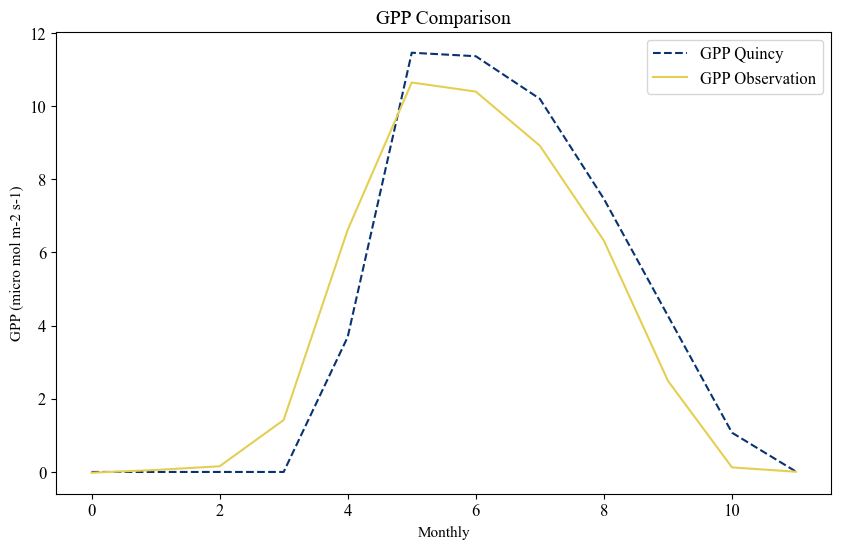

In [46]:
# Plot GPP Monthly Using Class

# index, y_mod, y_obs, y_unit, y_mod_label,y_obs_label, plot_title, x_label, y_label
GPP_monthly_vars = Plotting(df_all_monthly_avg.index, df_all_monthly_avg['gpp_avg'], df_all_monthly_avg['GPP'], "GPP Quincy", "GPP Observation", "GPP Comparison", "Monthly", "GPP (micro mol m-2 s-1)" )
GPP_monthly_vars.basic_plot()

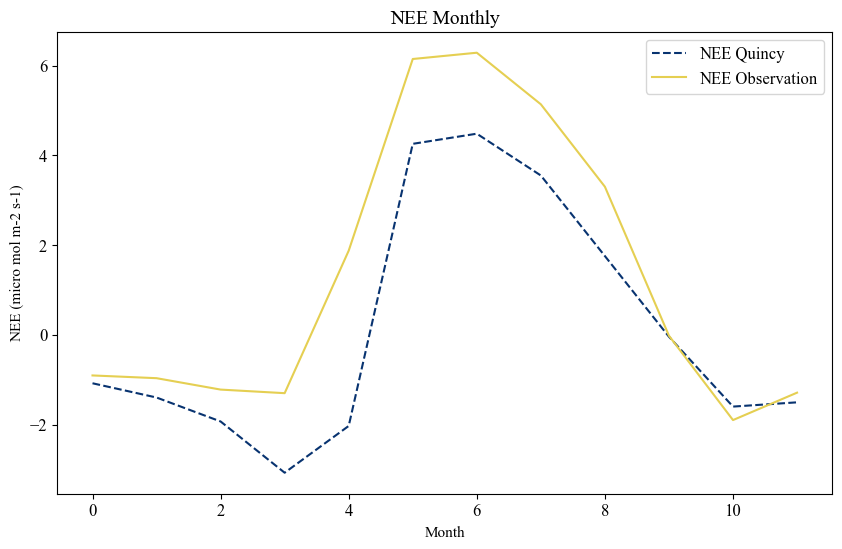

In [45]:
# Plot NEE Monthly

# index, y_mod, y_obs, y_unit, y_mod_label,y_obs_label, plot_title, x_label, y_label
NEE_monthly_vars = Plotting(df_all_monthly_avg.index, df_all_monthly_avg['NEE_quincy'], -df_all_monthly_avg['NEE'], "NEE Quincy", "NEE Observation", "NEE Monthly", "Month", "NEE (micro mol m-2 s-1)" )
NEE_monthly_vars.basic_plot()

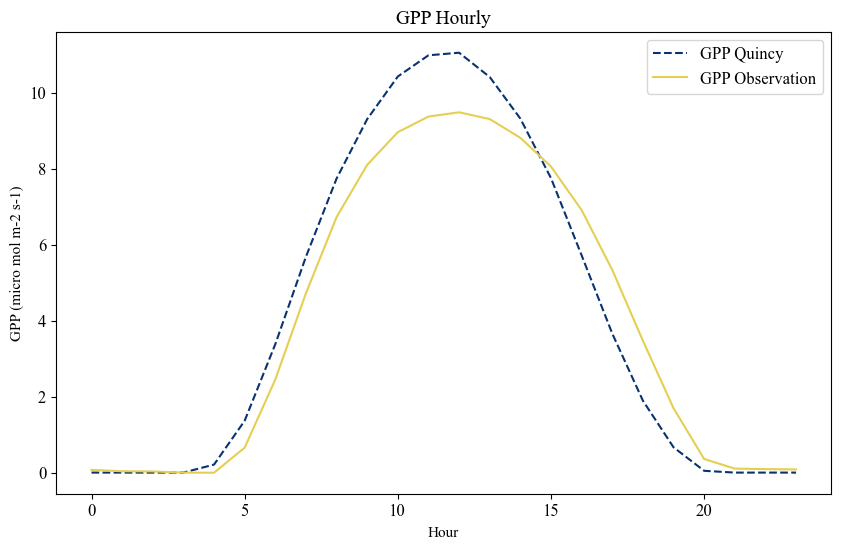

In [44]:
# Plot GPP Hourly

# index, y_mod, y_obs, y_unit, y_mod_label,y_obs_label, plot_title, x_label, y_label
GPP_hourly_vars = Plotting(df_all_hourly_avg.index, df_all_hourly_avg['gpp_avg'], df_all_hourly_avg['GPP'], "GPP Quincy", "GPP Observation", "GPP Hourly", "Hour", "GPP (micro mol m-2 s-1)" )
GPP_hourly_vars.basic_plot()

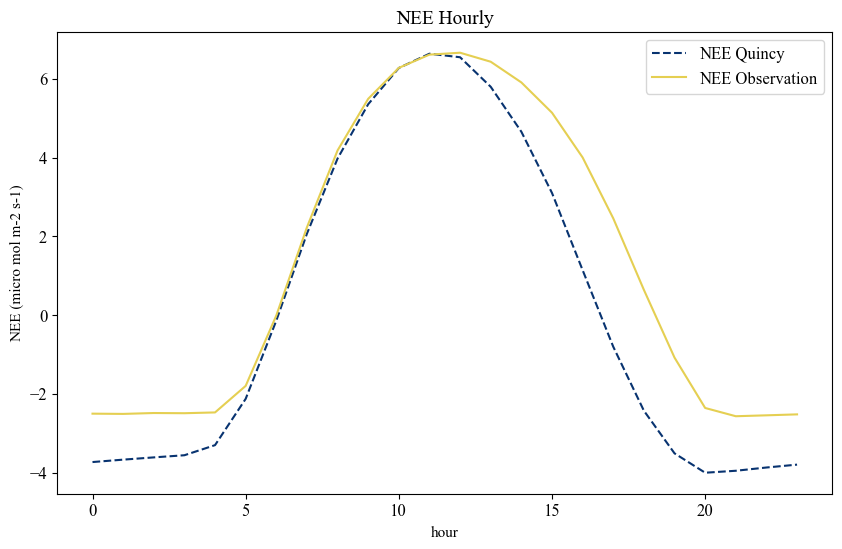

In [47]:
# Plot NEE Hourly

# index, y_mod, y_obs, y_unit, y_mod_label,y_obs_label, plot_title, x_label, y_label
NEE_hourly_vars = Plotting(df_all_hourly_avg.index, df_all_hourly_avg['NEE_quincy'], -df_all_hourly_avg['NEE'], "NEE Quincy", "NEE Observation", "NEE Hourly", "hour", "NEE (micro mol m-2 s-1)" )
NEE_hourly_vars.basic_plot()

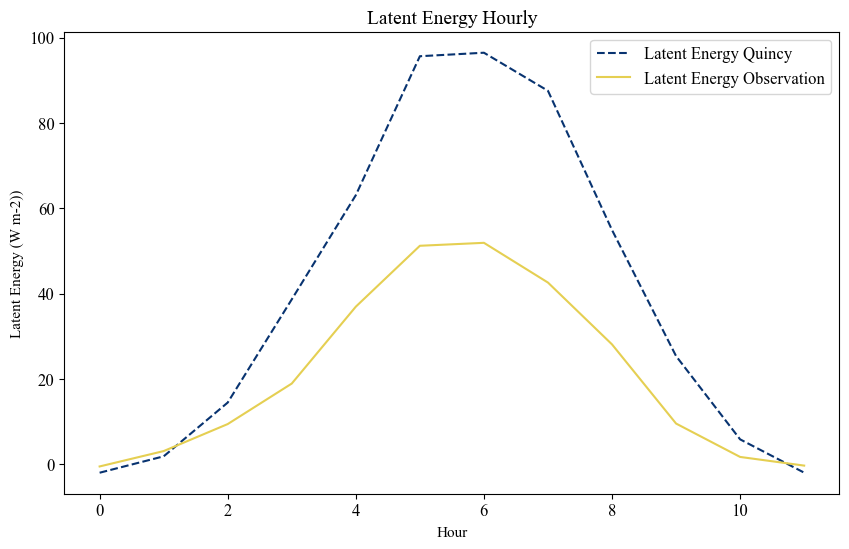

In [49]:
# Plot Latent Energy hourly

# index, y_mod, y_obs, y_unit, y_mod_label,y_obs_label, plot_title, x_label, y_label
NEE_monthly_vars = Plotting(df_all_monthly_avg.index, -df_all_monthly_avg['qle_avg'], df_all_monthly_avg['LE'], "Latent Energy Quincy", "Latent Energy Observation", "Latent Energy Hourly", "Hour", "Latent Energy (W m-2))" )
NEE_monthly_vars.basic_plot()